In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Ecommerce_Sales_Prediction_Dataset.csv')
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01/01/2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02/01/2023,Toys,569.48,3.60,Premium,6807.56,16
2,03/01/2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04/01/2023,Toys,923.27,0.61,Premium,9422.75,29
4,05/01/2023,Toys,710.17,47.83,Premium,1756.83,17


In [61]:
numeric_df = df.select_dtypes(include='number')
df.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


In [66]:
mean = df.describe().loc['mean']
median = df.describe().loc['50%']
mode = numeric_df.mode().iloc[0]
print("Mean:\n", mean)
print("Median:\n", median)
print("Mode:\n", mode)

Mean:
 Price               505.24192
Discount             24.91975
Marketing_Spend    4912.83024
Units_Sold           29.63100
Name: mean, dtype: float64
Median:
 Price               509.310
Discount             24.965
Marketing_Spend    4837.245
Units_Sold           30.000
Name: 50%, dtype: float64
Mode:
 Price              113.07
Discount            23.20
Marketing_Spend    100.30
Units_Sold          31.00
Name: 0, dtype: float64


In [67]:
max = df.describe().loc['min']
min = df.describe().loc['max']
std = df.describe().loc['std']
range = max - min
var = std**2
print("Range:", range)
print("Range:", std)
print("Variance:", var)

Range: Price              -984.83
Discount            -49.91
Marketing_Spend   -9895.32
Units_Sold          -52.00
dtype: float64
Range: Price               289.791248
Discount             14.439951
Marketing_Spend    2840.602656
Units_Sold            7.267989
Name: std, dtype: float64
Variance: Price              8.397897e+04
Discount           2.085122e+02
Marketing_Spend    8.069023e+06
Units_Sold         5.282366e+01
Name: std, dtype: float64


In [53]:
df_quartiles = df.describe().loc[['25%','50%','75%']]
df_quartiles

,Price,Discount,Marketing_Spend,Units_Sold
25%,243.3425,12.9950,2413.020,24.0
50%,509.3100,24.9650,4837.245,30.0
75%,747.5925,37.5625,7319.675,34.0


In [79]:
z_scores = (numeric_df - mean) / std
z_scores

,Price,Discount,Marketing_Spend,Units_Sold
0,1.475400,0.754868,0.657448,0.325950
1,0.221670,-1.476442,0.667017,-1.875484
2,0.670959,-1.479212,-0.393902,-0.361998
3,1.442515,-1.683506,1.587663,-0.086819
4,0.707158,1.586588,-1.111032,-1.737895
...,...,...,...,...
995,0.810301,1.671768,-1.063859,0.601129
996,0.040919,0.246556,1.090906,-1.187536
997,0.614884,-0.826855,-0.529578,-1.462715
998,-1.566583,-0.212587,0.852914,-0.499588


In [90]:
for cols in numeric_df:
  q1 = numeric_df[cols].quantile(0.25)
  q3 = numeric_df[cols].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df['outlier_iqr'] = ((numeric_df[cols] < lower_bound) | (numeric_df[cols] > upper_bound))
outliers_iqr = df[df['outlier_iqr'] == True]
outliers_iqr

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,outlier_iqr
138,19/05/2023,Fashion,179.96,33.82,Occasional,2044.55,50,True
261,19/09/2023,Home Decor,407.91,20.59,Occasional,7091.84,5,True
522,06/06/2024,Sports,90.81,21.09,Occasional,7123.44,52,True
544,28/06/2024,Electronics,265.11,37.56,Occasional,4476.86,50,True
641,03/10/2024,Toys,707.63,17.02,Occasional,4837.43,57,True


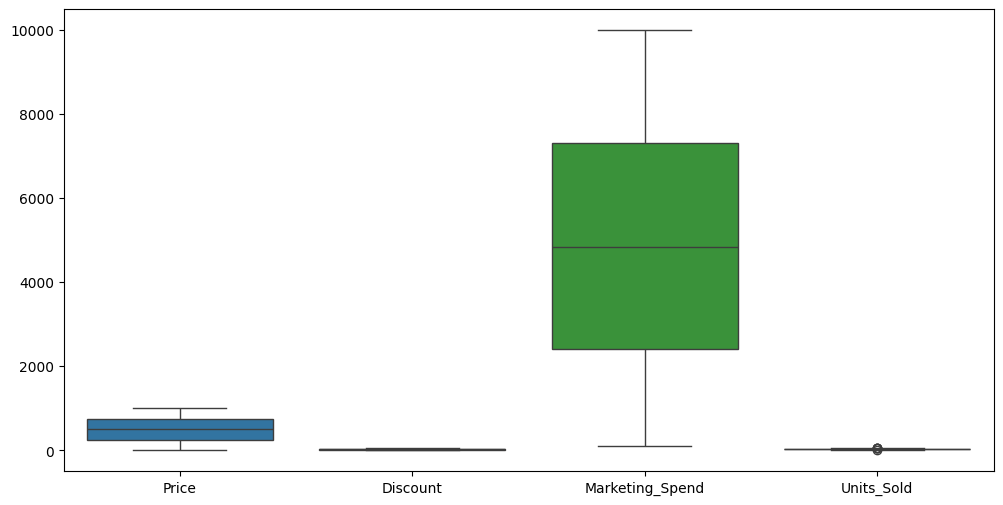

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.show()